# Holywood Theatrical Market 1995-2021

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
from collections import Counter

###IMPORTING DATA

In [3]:
TopProductionMethod = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/TopProductionMethods.csv')
TopDistributors = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/TopDistributors.csv')
TopGenres = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/TopGenres.csv')
PouplarCreativeTypes = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/PopularCreativeTypes.csv')
TopGrossingRating = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/TopGrossingRatings.csv')
TopGrossingSources = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/TopGrossingSources.csv')
WideReleasesCount = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/WideReleasesCount.csv')
HighestGrossers = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/HighestGrossers.csv')
AnnualTicketSales = pd.read_csv('/content/gdrive/MyDrive/Datasets/Hollywood Theatrical Market Synopsis 1995 to 2021/AnnualTicketSales.csv', thousands=',')


#ANNUAL TICKET SALES

In [4]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,423774881,"$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,223638958,"$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,1228541629,"$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,1311536128,"$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,1225639761,"$10,993,991,460","$11,226,860,216",$8.97,NaN


In [5]:
AnnualTicketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     int64  
 2   TOTAL BOX OFFICE                     27 non-null     object 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object 
 4   AVERAGE TICKET PRICE                 27 non-null     object 
 5   Unnamed: 5                           0 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ KB


In [6]:
def clean(df,col):
    k = []
    for i in df[col]:
            k.append(i.replace('$','').replace(',','').replace('%',''))
    df[col] = k


#ALTERNATIVE METHOD
  # AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace(',', '')
  # AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$', '')

  # AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',', '')
  # AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$', '')

  # AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$', '')

In [7]:
clean(AnnualTicketSales, 'TOTAL BOX OFFICE')
clean(AnnualTicketSales, 'TOTAL INFLATION ADJUSTED BOX OFFICE')
clean(AnnualTicketSales, 'AVERAGE TICKET PRICE')

AnnualTicketSales.drop('Unnamed: 5', axis = 1 , inplace = True)  #REMOVE UNNAMED


#CONVERT DATATYPE
AnnualTicketSales["TOTAL BOX OFFICE"] = AnnualTicketSales['TOTAL BOX OFFICE'].astype(str).astype(int)
AnnualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype(str).astype(int)

In [8]:
AnnualTicketSales.isnull().sum()

YEAR                                   0
TICKETS SOLD                           0
TOTAL BOX OFFICE                       0
TOTAL INFLATION ADJUSTED BOX OFFICE    0
AVERAGE TICKET PRICE                   0
dtype: int64

In [9]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


###TOTAL TICKETS SOLD PER YEAR

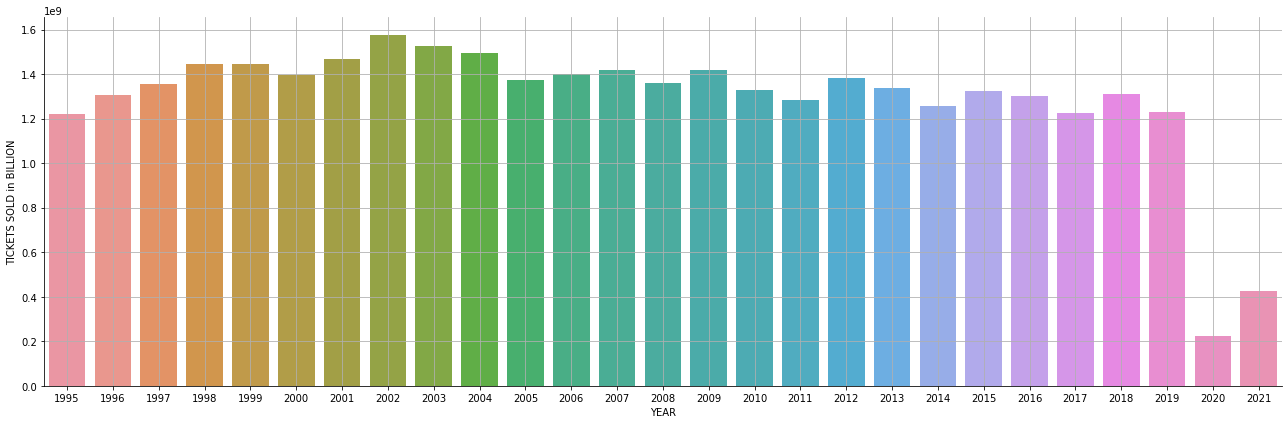

In [10]:
Ax = sns.catplot(y='TICKETS SOLD', x="YEAR", kind='bar', data=AnnualTicketSales, height=6, aspect=3)
plt.ylabel("TICKETS SOLD in BILLION")
plt.grid(True)

###MOST TICKETS SOLD YEARS

In [11]:
TopYears = AnnualTicketSales.nlargest(5, 'TICKETS SOLD')[['YEAR', 'TICKETS SOLD']]

fig = px.bar(x = [i for i in TopYears.YEAR],
             y = [i for i in TopYears['TICKETS SOLD']],
             color = [i for i in TopYears['TICKETS SOLD']])

fig.update_layout(xaxis_title = 'YEARS',
                  yaxis_title = 'Tickets Sold',
                  title = 'Distribution based Tickets Sold - YEARS')

###LEAST TICKETS SOLD YEARS

Text(0.11, -0.05, 'As we can observe because of the Pandemic, Year 2017, 2020, 2021 were most affected years for this Industry.')

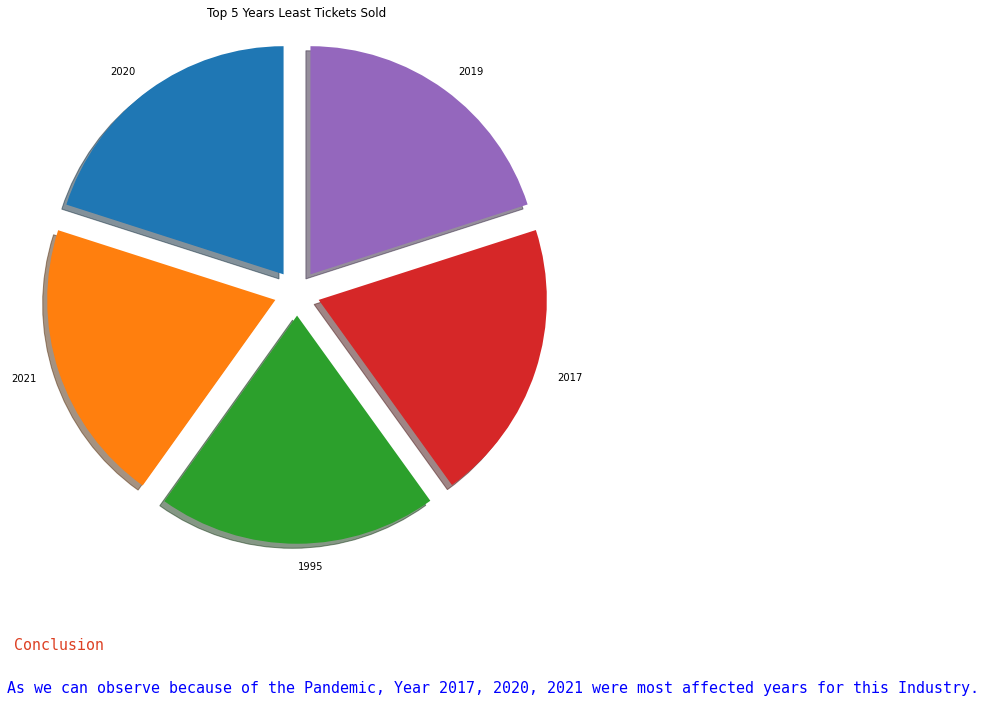

In [12]:
LeastYears = [str(i) for i in AnnualTicketSales.nsmallest(5, 'TICKETS SOLD')['YEAR'].to_list()]


explode = (0.1, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

ax1.pie(LeastYears,explode=explode, 
        labels=[i for i in LeastYears],
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Top 5 Years Least Tickets Sold')

plt.figtext(0.12, 0.01, 'Conclusion', 
            fontname = 'monospace', 
            size = 15, color = '#dd4124')

plt.figtext(0.11, -0.05,"As we can observe because of the Pandemic, Year 2017, 2020, 2021 were most affected years for this Industry.",
            fontname = 'monospace', size = 15, color = 'b')

###TOP BOX OFFICE TOP YEARS

In [13]:
Topboxoffice = AnnualTicketSales.nlargest(5,'TOTAL BOX OFFICE')[['YEAR','TOTAL BOX OFFICE']]


fig = px.bar(x = [i for i in Topboxoffice.YEAR],
             y = [i for i in Topboxoffice['TOTAL BOX OFFICE']],
             color =[i for i in Topboxoffice['TOTAL BOX OFFICE']])

fig.update_layout(xaxis_title = 'YEARS',
                  yaxis_title = 'Total Box Office ($)',
                  title = 'Distribution based on Top Box Office - Years')

###TOTAL BOX OFFICE WORST YEARS

In [14]:
worsthboxoffice = AnnualTicketSales.nsmallest(20, 'TOTAL BOX OFFICE')[['YEAR', 'TOTAL BOX OFFICE']]

fig = px.bar(x = [i for i in worsthboxoffice.YEAR],
             y = [i for i in worsthboxoffice['TOTAL BOX OFFICE']],
             color = [i for i in worsthboxoffice['TOTAL BOX OFFICE']])

fig.update_layout(xaxis_title = 'YEARS',
                  yaxis_title = 'Total Box Office ($)',
                  title = 'Distribution based on Worst Box Office - Years')

From the above graph we can say that Except year 2014, Every other year between 2012 - 2019 were the most booming years for this Industry.



###RELATION B/W AVERAGE TICKET PRICE - YEARS

In [15]:
ticketprices = AnnualTicketSales[['YEAR', 'AVERAGE TICKET PRICE']]

fig = px.bar(x = [i for i in ticketprices.YEAR],
             y = [i for i in ticketprices['AVERAGE TICKET PRICE']],
             color = [i for i in ticketprices['AVERAGE TICKET PRICE']])
fig.update_layout(xaxis_title = 'YEARS',
                  yaxis_title = 'AVERAGE TICKET PRICE ($)',
                  title = 'Distribution based AVERAGE TICKET PRICE - YEARS')

In [16]:
AnnualTicketSales['InflatedBoxOffice'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] - AnnualTicketSales["TOTAL BOX OFFICE"]


lastlonger = AnnualTicketSales[['YEAR', 'InflatedBoxOffice']]

fig = px.bar(x = [i for i in lastlonger.YEAR],
             y = [i for i in lastlonger['InflatedBoxOffice']],
             color = [i for i in lastlonger['InflatedBoxOffice']])

fig.update_layout(xaxis_title = 'YEARS',
                  yaxis_title = 'ADJUSTED BOX OFFICE ($)',
                  title = 'Distribution based Adjusted Box Office - Years')

#We can see a Decreasing Trend Overall

#HIGHEST GROSSERS

In [17]:
HighestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [18]:
HighestGrossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     object
 6   TOTAL IN 2019 DOLLARS  27 non-null     object
 7   TICKETS SOLD           27 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.8+ KB


In [19]:
clean(HighestGrossers, 'TOTAL FOR YEAR')
clean(HighestGrossers, 'TOTAL IN 2019 DOLLARS') 
clean(HighestGrossers, 'TICKETS SOLD')

HighestGrossers['TOTAL FOR YEAR']= HighestGrossers['TOTAL FOR YEAR'].astype(str).astype(int)
HighestGrossers["TICKETS SOLD"] = HighestGrossers["TICKETS SOLD"].astype(str).astype(int)
HighestGrossers["TOTAL IN 2019 DOLLARS"] = HighestGrossers["TOTAL IN 2019 DOLLARS"].astype(str).astype(int)

###TOP MOVIES

In [20]:
TopMovies = HighestGrossers.nlargest(10, 'TICKETS SOLD')[['MOVIE', 'TICKETS SOLD']]

fig = px.bar(x = [i for i in TopMovies.MOVIE],
             y = [i for i in TopMovies["TICKETS SOLD"]],
             color = [i for i in TopMovies['TICKETS SOLD']])

fig.update_layout(xaxis_title = 'BEST MOVIES',
                  yaxis_title = 'TICKETS SOLD',
                  title = 'Distribution based On Most Tickets Sold')

###WORST MOVIES

In [21]:
WorstMovies = HighestGrossers.nsmallest(5, 'TICKETS SOLD')[['MOVIE', 'TICKETS SOLD']]

fig = px.bar(x = [i for i in WorstMovies.MOVIE],
             y = [i for i in WorstMovies['TICKETS SOLD']],
             color = [i for i in WorstMovies['TICKETS SOLD']])

fig.update_layout(xaxis_title = 'MOVIES',
                  yaxis_title = 'TICKETS SOLD',
                  title = 'Distribution based on Least Tickets Sold')

###BEST MOVIES

In [22]:
HighestGrossers.dropna(inplace=True)

BestMovies = HighestGrossers.nlargest(10, 'TOTAL FOR YEAR')[['MOVIE', 'TOTAL FOR YEAR']]

fig = px.bar(x = [i for i in BestMovies.MOVIE],
             y = [i for i in BestMovies['TOTAL FOR YEAR']],
             color = [i for i in BestMovies['TOTAL FOR YEAR']])

fig.update_layout(xaxis_title = 'MOVIES',
                  yaxis_title = 'TOTAL FOR YEAR',
                  title = 'Distribution based on Top Revenue Returning Movies')

In [23]:
WrstMovies = HighestGrossers.nsmallest(5, 'TOTAL IN 2019 DOLLARS')[['MOVIE', 'TOTAL IN 2019 DOLLARS']]

fig = px.bar(x = [i for i in WrstMovies.MOVIE],
             y = [i for i in WrstMovies['TOTAL IN 2019 DOLLARS']],
             color = [i for i in WrstMovies['TOTAL IN 2019 DOLLARS']])

fig.update_layout(xaxis_title = 'MOVIES',
                  yaxis_title = 'TOTAL IN 2019 DOLLARS',
                  title = 'Distribution based on Movies Returned Least Revenue till 2019')


###TOP DISTRIBUTORS

In [24]:
c = Counter(HighestGrossers['DISTRIBUTOR'])

fig = px.bar(x = [i[0] for i in c.items()],
             y = [i[1] for i in c.items()],
             color = [i for i in (c)])

fig.update_layout(xaxis_title = 'Distributor',
                  yaxis_title = 'No. Of Years',
                  title = 'Distribution based on Distributors')


In [25]:
dist =  HighestGrossers.nlargest(10,'TICKETS SOLD')[['DISTRIBUTOR','TICKETS SOLD']]

fig = px.bar(x = [i for i in dist['DISTRIBUTOR']],
             y = [i for i in dist['TICKETS SOLD']],
             color=[i for i in dist['DISTRIBUTOR']])

fig.update_layout(xaxis_title = 'DISTRIBUTOR',
                  yaxis_title = 'TOTAL TICKETS SOLD',
                  title = 'Distribution based on Most Choosen Distributor')


###TOP GENRES

In [26]:
c1 = Counter(HighestGrossers['GENRE'])

fig = px.bar(x = [i[0] for i in c1.items()],
             y = [i[1] for i in c1.items()],
             color =[i for i in (c1)])

fig.update_layout(xaxis_title = 'Genres',
                  yaxis_title = 'No. Of Years',
                  title = 'Distribution based on Genre')

###TOP MPAA CHOICE

In [27]:
mpaa = HighestGrossers[['MPAA RATING', 'TICKETS SOLD']]

fig = px.bar(x = [i for i in mpaa['MPAA RATING']],
             y = [i for i in mpaa['TICKETS SOLD']],
             color=[i for i in mpaa['MPAA RATING']])

fig.update_layout(xaxis_title = 'MPAA RATING',
                  yaxis_title = 'TOTAL TICKETS SOLD',
                  title = 'Distribution based on Most Choosen MPAA Ratings')

#From the above graph we can say that MPAA Rating 'G' is the worst MPAA Rating a movie can get, Best is PG-13


###Top 10 Movies of all TIme by Total earnings.

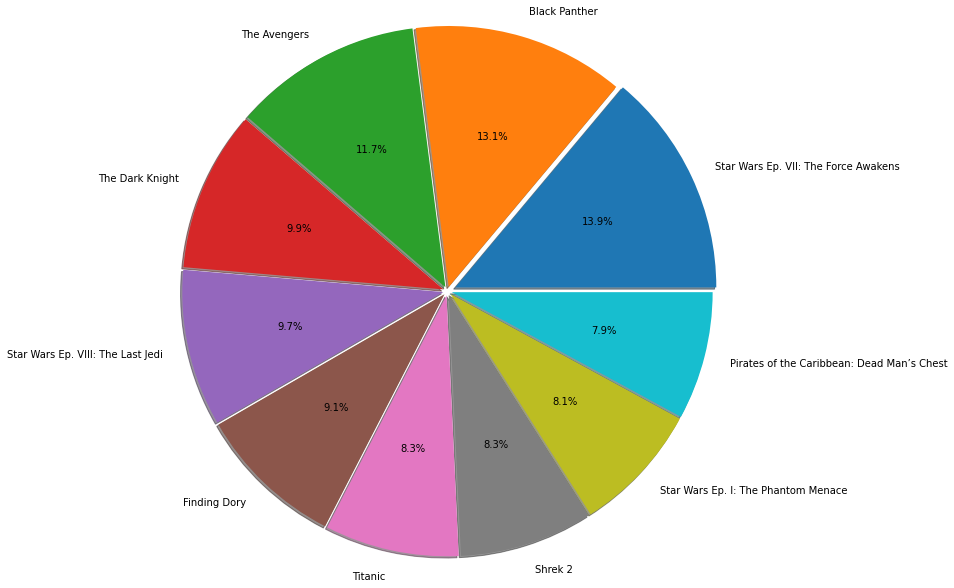

In [28]:
df = pd.DataFrame(HighestGrossers, columns= ['MOVIE', 'TOTAL FOR YEAR'])

df.sort_values(by= ['TOTAL FOR YEAR'], ascending = False, inplace= True)


plt.pie(df['TOTAL FOR YEAR'][0:10], labels= df['MOVIE'][0:10], autopct= '%1.1f%%',
        explode= (0.1,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), radius=3, shadow=True)

plt.show()

#WIDE RELEASES COUNT

In [29]:
WideReleasesCount.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [30]:
WideReleasesCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 27 non-null     int64  
 1   WARNER BROS          27 non-null     int64  
 2   WALT DISNEY          27 non-null     int64  
 3   20TH CENTURY FOX     27 non-null     int64  
 4   PARAMOUNT PICTURES   27 non-null     int64  
 5   SONY PICTURES        27 non-null     int64  
 6   UNIVERSAL            27 non-null     int64  
 7   TOTAL MAJOR 6        27 non-null     int64  
 8   TOTAL OTHER STUDIOS  27 non-null     int64  
 9   Unnamed: 9           0 non-null      float64
dtypes: float64(1), int64(9)
memory usage: 2.2 KB


In [31]:
WideReleasesCount.isnull().sum()

YEAR                    0
WARNER BROS             0
WALT DISNEY             0
20TH CENTURY FOX        0
PARAMOUNT PICTURES      0
SONY PICTURES           0
UNIVERSAL               0
TOTAL MAJOR 6           0
TOTAL OTHER STUDIOS     0
Unnamed: 9             27
dtype: int64

In [32]:
#We have 27 years and 9 Unnamed has 27 null years. Drop it!

WideReleasesCount.drop('Unnamed: 9', axis = 1 , inplace = True)  

#Alternatively Method
   #col_drop = ['Unnamed: 9']
   #WideReleasesCount = WideReleasesCount.drop(col_drop, axis=1)

In [33]:
y = 'TOTAL MAJOR 6'
x = 'YEAR'

dframe = WideReleasesCount


fig = px.bar(x = [i for i in dframe[x]],y = [i for i in dframe[y]],color=[i for i in dframe[x]])
fig.update_layout(xaxis_title = x,yaxis_title = y,title = f'Distribution based on {y} & {x}')

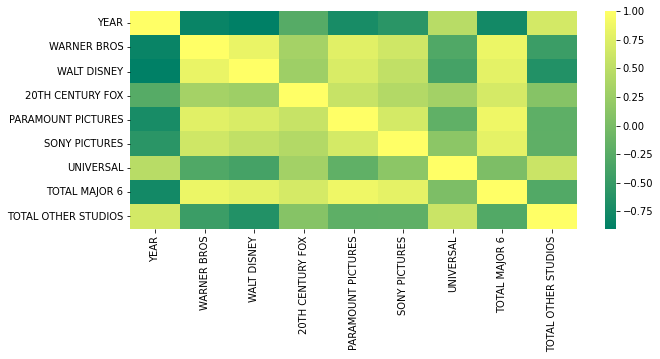

In [34]:
plt.figure(figsize=(10,4))

sns.heatmap(WideReleasesCount.corr(), annot=False, cmap='summer')
plt.show()

#TOP GENRES

In [35]:
TopGenres.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%


In [36]:
clean(TopGenres,'TOTAL GROSS')


TopGenres['TOTAL GROSS'] = TopGenres['TOTAL GROSS'].astype(str).astype(int)

<Figure size 576x288 with 0 Axes>

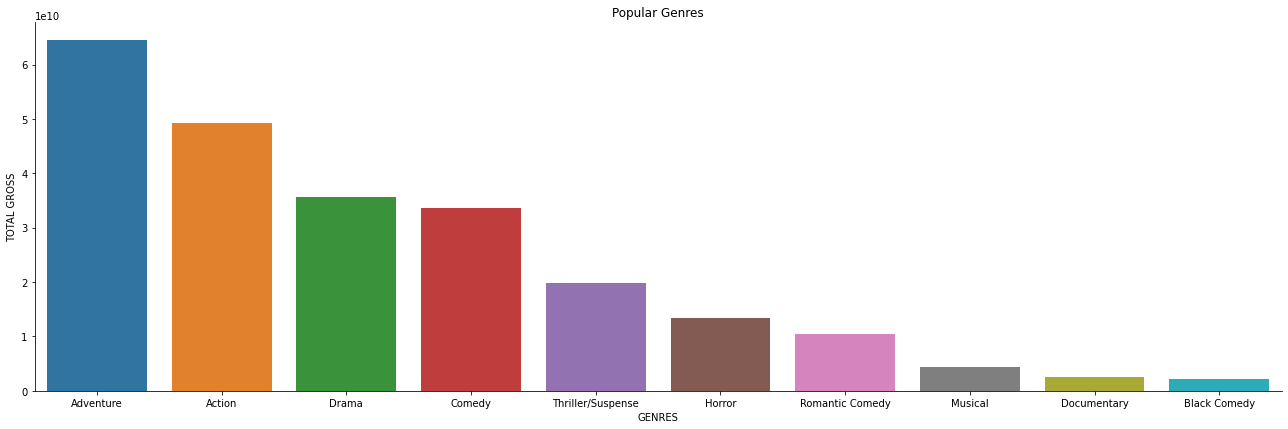

In [37]:
plt.figure(figsize=(8,4))

sns.catplot(y="TOTAL GROSS", x="GENRES", kind="bar", data=TopGenres, height=6, aspect=3)

plt.ylabel('TOTAL GROSS')
plt.title("Popular Genres")

plt.show()

#POPULAR CREATIVE TYPES

In [38]:
PouplarCreativeTypes.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%


In [39]:
PouplarCreativeTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANK            9 non-null      float64
 1   CREATIVE TYPES  9 non-null      object 
 2   MOVIES          9 non-null      object 
 3   TOTAL GROSS     9 non-null      object 
 4   AVERAGE GROSS   9 non-null      object 
 5   MARKET SHARE    9 non-null      object 
dtypes: float64(1), object(5)
memory usage: 608.0+ bytes


In [40]:
PouplarCreativeTypes.dropna(inplace = True)

clean(PouplarCreativeTypes, 'TOTAL GROSS')
clean(PouplarCreativeTypes, 'AVERAGE GROSS')
clean(PouplarCreativeTypes, 'MARKET SHARE')

PouplarCreativeTypes = PouplarCreativeTypes.apply(pd.to_numeric, errors = 'ignore')

In [41]:
PouplarCreativeTypes.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442",96203727036,12927133,40.46
1,2.0,Kids Fiction,564,32035539746,56800602,13.47
2,3.0,Science Fiction,724,29922660857,41329642,12.59
3,4.0,Fantasy,759,21724062575,28621953,9.14
4,5.0,Super Hero,129,20273157911,157156263,8.53


In [42]:
y = 'TOTAL GROSS'
x = 'CREATIVE TYPES'
dframe = PouplarCreativeTypes

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [43]:
y = 'MOVIES'
x = 'CREATIVE TYPES'
dframe = PouplarCreativeTypes

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [44]:
y = 'MARKET SHARE'
x = 'CREATIVE TYPES'
dframe = PouplarCreativeTypes

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [45]:
y = 'AVERAGE GROSS'
x = 'CREATIVE TYPES'
dframe = PouplarCreativeTypes

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

#TOP DISTRIBUTORS

In [46]:
TopDistributors.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%


In [47]:
TopDistributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   DISTRIBUTORS   10 non-null     object
 2   MOVIES         10 non-null     int64 
 3   TOTAL GROSS    10 non-null     object
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


In [48]:
TopDistributors.dropna(inplace=True)

TopDistributors = TopDistributors.astype(str)

clean(TopDistributors,'TOTAL GROSS')
clean(TopDistributors,'AVERAGE GROSS')
clean(TopDistributors,'MOVIES')
clean(TopDistributors,'MARKET SHARE')

TopDistributors = TopDistributors.apply(pd.to_numeric,errors = 'ignore')


In [49]:
TopDistributors.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,17.02
1,2,Warner Bros.,824,36269425479,44016293,15.25
2,3,Sony Pictures,747,29113002302,38973229,12.24
3,4,Universal,535,28089932569,52504547,11.81
4,5,20th Century Fox,525,25857839756,49253028,10.88


In [50]:
y = 'TOTAL GROSS'
x = 'DISTRIBUTORS'

dframe = TopDistributors

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [51]:
y = 'MARKET SHARE'
x = 'DISTRIBUTORS'

dframe = TopDistributors

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [52]:
y = 'AVERAGE GROSS'
x = 'DISTRIBUTORS'

dframe = TopDistributors

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [53]:
y = 'MOVIES'
x = 'DISTRIBUTORS'

dframe = TopDistributors

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


#TOP GENRES 

In [54]:
TopGenres.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102",64529536530,"$58,556,748",27.14%
1,2,Action,"1,098",49339974493,"$44,936,224",20.75%
2,3,Drama,"5,479",35586177269,"$6,495,013",14.97%
3,4,Comedy,"2,418",33687992318,"$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186",19810201102,"$16,703,374",8.33%


In [55]:
TopGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   GENRES         10 non-null     object
 2   MOVIES         10 non-null     object
 3   TOTAL GROSS    10 non-null     int64 
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


In [56]:
TopGenres.dropna(inplace=True)

TopGenres = TopGenres.astype(str)

clean(TopGenres,'TOTAL GROSS')
clean(TopGenres,'AVERAGE GROSS')
clean(TopGenres,'MOVIES')
clean(TopGenres,'MARKET SHARE')

TopGenres = TopGenres.apply(pd.to_numeric,errors = 'ignore')

In [57]:
TopGenres.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,1102,64529536530,58556748,27.14
1,2,Action,1098,49339974493,44936224,20.75
2,3,Drama,5479,35586177269,6495013,14.97
3,4,Comedy,2418,33687992318,13932172,14.17
4,5,Thriller/Suspense,1186,19810201102,16703374,8.33


In [58]:
y = 'MOVIES'
x = 'GENRES'

dframe = TopGenres

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [59]:
y = 'TOTAL GROSS'
x = 'GENRES'

dframe = TopGenres

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [60]:
y = 'AVERAGE GROSS'
x = 'GENRES'

dframe = TopGenres

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [61]:
y = 'MARKET SHARE'
x = 'GENRES'

dframe = TopGenres

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

#TOP PRODUCTIONS

In [62]:
TopProductionMethod.head()

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,"14,613","$179,637,201,848","$12,292,972",75.56%
1,2,Animation/Live Action,264,"$30,346,622,254","$114,949,327",12.76%
2,3,Digital Animation,365,"$23,920,180,508","$65,534,741",10.06%
3,4,Hand Animation,164,"$2,960,497,487","$18,051,814",1.25%
4,5,Stop-Motion Animation,37,"$676,490,120","$18,283,517",0.28%


In [63]:
TopProductionMethod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RANK                7 non-null      int64 
 1   PRODUCTION METHODS  7 non-null      object
 2   MOVIES              7 non-null      object
 3   TOTAL GROSS         7 non-null      object
 4   AVERAGE GROSS       7 non-null      object
 5   MARKET SHARE        7 non-null      object
dtypes: int64(1), object(5)
memory usage: 464.0+ bytes


In [64]:
TopProductionMethod.dropna(inplace=True)

TopProductionMethod = TopProductionMethod.astype(str)

clean(TopProductionMethod,'TOTAL GROSS')
clean(TopProductionMethod,'AVERAGE GROSS')
clean(TopProductionMethod,'MOVIES')
clean(TopProductionMethod,'MARKET SHARE')

TopProductionMethod = TopProductionMethod.apply(pd.to_numeric,errors = 'ignore')


In [65]:
y = 'MOVIES'
x = 'PRODUCTION METHODS'

dframe = TopProductionMethod

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [66]:
y = 'TOTAL GROSS'
x = 'PRODUCTION METHODS'

dframe = TopProductionMethod

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [67]:
y = 'AVERAGE GROSS'
x = 'PRODUCTION METHODS'

dframe = TopProductionMethod

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [68]:
y = 'MARKET SHARE'
x = 'PRODUCTION METHODS'

dframe = TopProductionMethod

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


#TOP GROSSING RATINGS

In [69]:
TopGrossingRating.head()

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,"3,243","$113,524,789,243","$35,006,102",47.75%
1,2,R,"5,480","$63,497,164,978","$11,587,074",26.71%
2,3,PG,"1,535","$49,124,317,794","$32,002,813",20.66%
3,4,G,395,"$9,572,240,391","$24,233,520",4.03%
4,5,Not Rated,"5,820","$1,918,358,283","$329,615",0.81%


In [70]:
TopGrossingRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           8 non-null      int64 
 1   MPAA RATINGS   8 non-null      object
 2   MOVIES         8 non-null      object
 3   TOTAL GROSS    8 non-null      object
 4   AVERAGE GROSS  8 non-null      object
 5   MARKET SHARE   8 non-null      object
dtypes: int64(1), object(5)
memory usage: 512.0+ bytes


In [71]:
TopGrossingRating.dropna(inplace=True)

TopGrossingRating = TopGrossingRating.astype(str)

clean(TopGrossingRating,'TOTAL GROSS')
clean(TopGrossingRating,'AVERAGE GROSS')
clean(TopGrossingRating,'MOVIES')
clean(TopGrossingRating,'MARKET SHARE')

TopGrossingRating = TopGrossingRating.apply(pd.to_numeric,errors = 'ignore')

In [72]:
y = 'MOVIES'
x = 'MPAA RATINGS'

dframe = TopGrossingRating

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [73]:
y = 'TOTAL GROSS'
x = 'MPAA RATINGS'

dframe = TopGrossingRating

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')


In [74]:
y = 'AVERAGE GROSS'
x = 'MPAA RATINGS'

dframe = TopGrossingRating

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')

In [75]:
y = 'MARKET SHARE'
x = 'MPAA RATINGS'

dframe = TopGrossingRating

fig = px.bar(x = [i for i in dframe[x]],
             y = [i for i in dframe[y]],
             color=[i for i in dframe[x]])

fig.update_layout(xaxis_title = x,
                  yaxis_title = y,
                  title = f'Distribution based on {y} & {x}')